## Real Estate - Price Predictor

##Reference:
###1. Stackoverflow
###2. YouTube

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
housing_df = pd.read_csv("data.csv")

In [ ]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing_df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


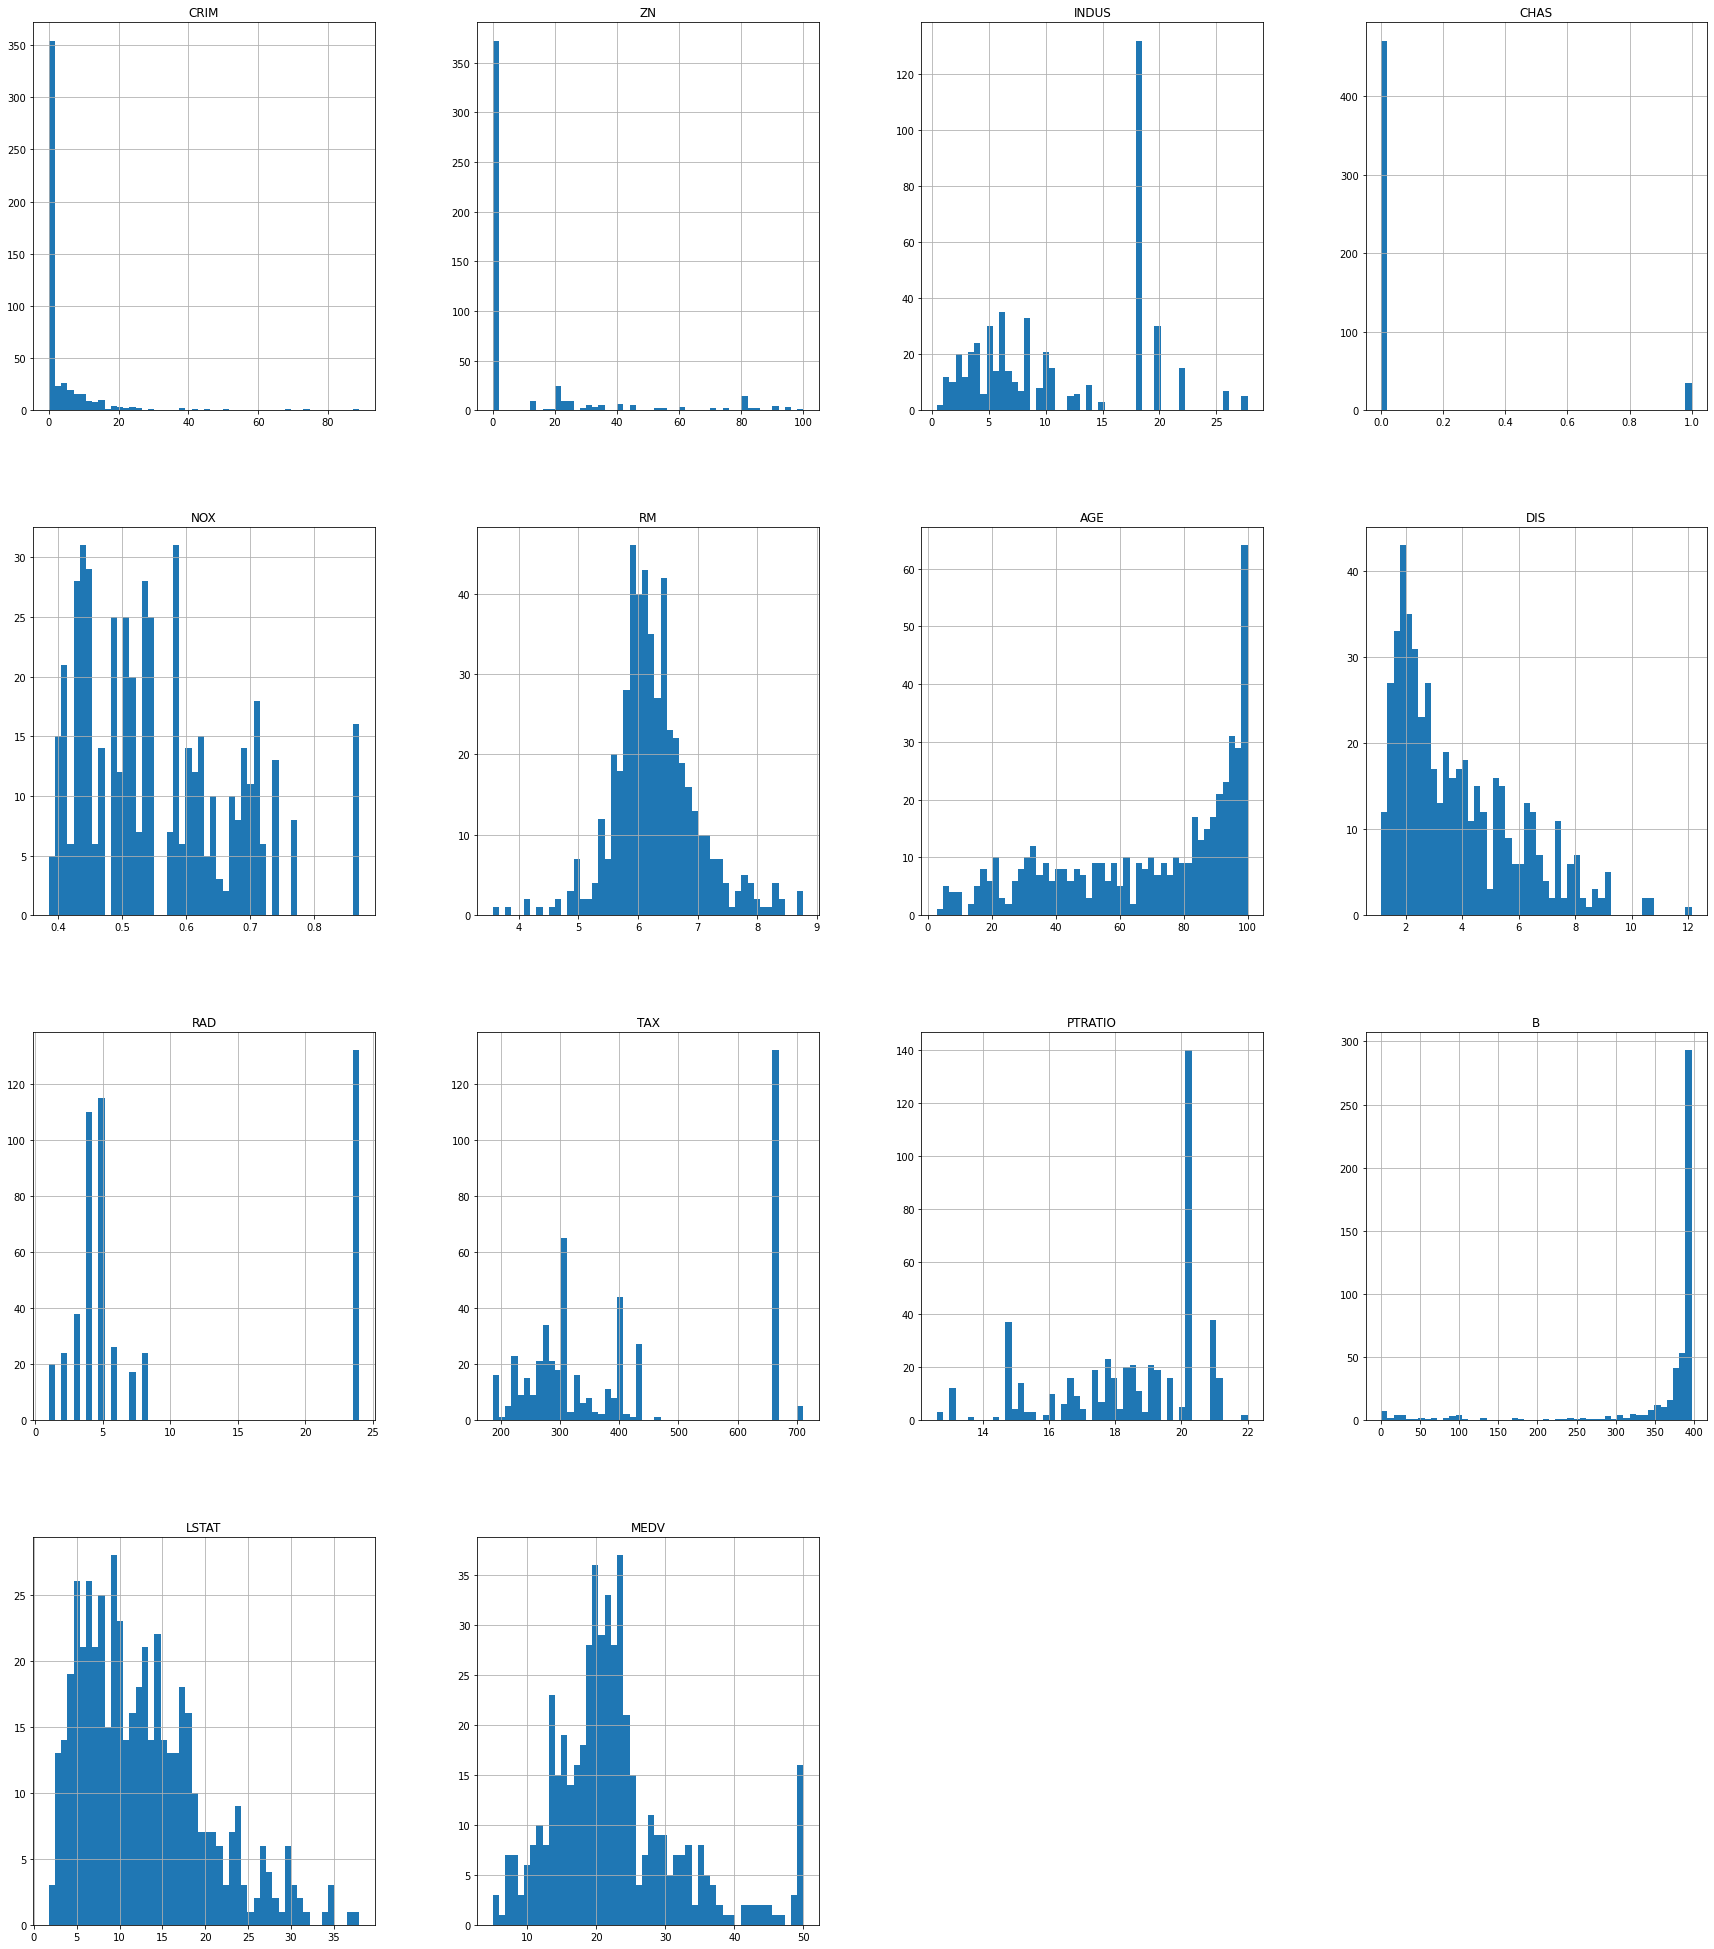

In [ ]:
housing_df.hist(bins=50, figsize=(30, 35))
plt.show()

## Looking for Correlations

In [ ]:
correlation_matrix = housing_df.corr()
correlation_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

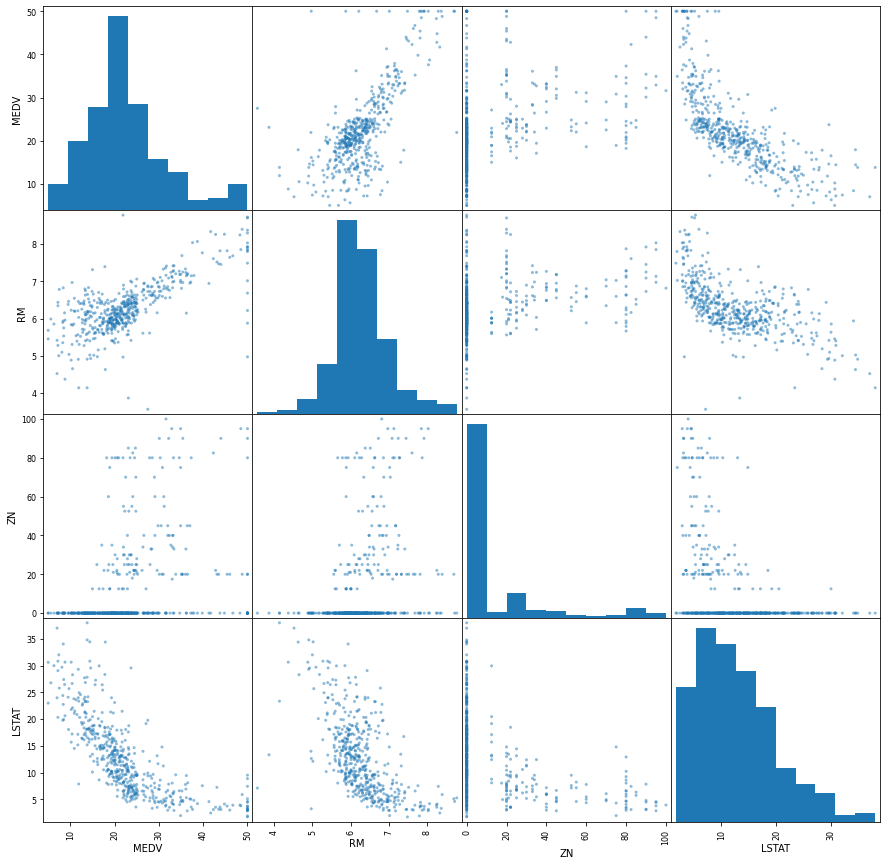

In [ ]:
from pandas.plotting import scatter_matrix
features = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing_df[features], figsize = (15,15))
plt.show()

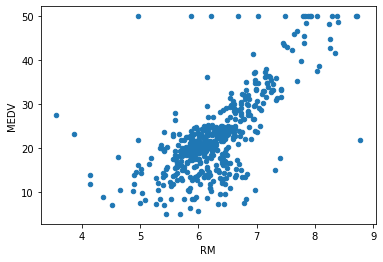

In [ ]:
housing_df.plot(kind="scatter", x="RM", y="MEDV", alpha=1.0)

## Trying out feature combinations


In [ ]:
TAXRM = housing_df['TAX']/housing_df['RM']
housing_df["TAXRM"] = TAXRM

In [ ]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [ ]:
correlation_matrix = housing_df.corr()
correlation_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.540380
LSTAT     -0.737663
Name: MEDV, dtype: float64

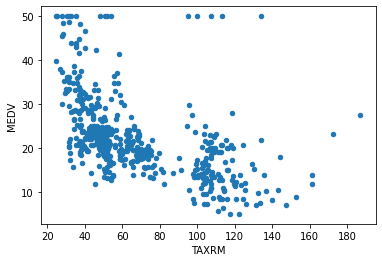

In [ ]:
housing_df.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=1.0)

## Missing Attributes

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit_transform(housing_df)

array([[6.32000000e-03, 1.80000000e+01, 2.31000000e+00, ...,
        4.98000000e+00, 2.40000000e+01, 4.50190114e+01],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        9.14000000e+00, 2.16000000e+01, 3.76888335e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        4.03000000e+00, 3.47000000e+01, 3.36812804e+01],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        5.64000000e+00, 2.39000000e+01, 3.91341743e+01],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        6.48000000e+00, 2.20000000e+01, 4.01825140e+01],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        7.88000000e+00, 1.19000000e+01, 4.52736318e+01]])

In [ ]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20800000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

In [ ]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.906572
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.450491
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.497173
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,98.201121
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


## Train-Test Splitting(80:20)

In [ ]:
from sklearn.model_selection import train_test_split
stratified_train_set, stratified_test_set = train_test_split(
    housing_df, test_size=0.2, random_state=42, stratify=housing_df["CHAS"])

In [ ]:
stratified_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
stratified_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [ ]:
X_train = stratified_train_set.drop("MEDV", axis=1)
Y_train = stratified_train_set["MEDV"].copy()
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948


## Creating a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])


In [ ]:
X_train_prepared = my_pipeline.fit_transform(X_train)

In [ ]:
X_train_prepared.shape

(404, 14)

## Selecting a desired model for Dragon Real Estates

##1.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train_prepared, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_1, X_train_prepared, Y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([3.32546936, 3.2207587 , 4.33002429, 3.61561604, 4.87942502,
       4.00137121, 7.4743536 , 4.23851108, 3.65905946, 5.11074694])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

Scores: [3.32546936 3.2207587  4.33002429 3.61561604 4.87942502 4.00137121
 7.4743536  4.23851108 3.65905946 5.11074694]
Mean:  4.385533570427063
Standard deviation:  1.1867571051871046


##2.DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor()
model_2.fit(X_train_prepared, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_2, X_train_prepared, Y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([3.88197837, 5.57170552, 4.90333386, 4.16881571, 4.02622652,
       3.54961265, 4.40448635, 3.56198681, 3.49717743, 3.65482558])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

Scores: [3.88197837 5.57170552 4.90333386 4.16881571 4.02622652 3.54961265
 4.40448635 3.56198681 3.49717743 3.65482558]
Mean:  4.122014880284817
Standard deviation:  0.6411551388520584


##3.RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()
model_3.fit(X_train_prepared, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_3, X_train_prepared, Y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([2.96532577, 2.84171862, 4.37460941, 2.6477854 , 3.49226863,
       2.68923965, 4.80352418, 3.32944368, 3.2128034 , 3.20368849])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
print_scores(rmse_scores)

Scores: [2.96532577 2.84171862 4.37460941 2.6477854  3.49226863 2.68923965
 4.80352418 3.32944368 3.2128034  3.20368849]
Mean:  3.3560407240969377
Standard deviation:  0.6752124676689439


## Saving the model

### RandomForestRegressor(model_3) performs best among all.

In [ ]:
from joblib import dump, load
dump(model_3, 'RealEstatePricePredictor.joblib') 

['RealEstatePricePredictor.joblib']

## Testing the model on test data

In [ ]:
from sklearn.metrics import mean_squared_error
X_test = stratified_test_set.drop("MEDV", axis=1)
Y_test = stratified_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.fit_transform(X_test)
final_predictions = model_3.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[24.861 10.157 25.392 22.738 17.606 14.683 19.427 14.783 31.582 42.354
 18.819  9.326 25.822 31.715 20.546 12.073 32.081 14.777 23.372 16.754
 19.714 15.045 18.036 21.06  18.503 31.497 15.942 32.298  9.862 32.504
 22.924 21.117 22.909  9.099 20.188 12.192 42.966 23.479 23.741 44.195
 23.511 28.552 19.938 22.247 15.488 32.752 45.895 20.839 18.236 21.743
 21.071 14.509 18.815 14.014 24.826 34.291 42.72  28.828 18.491 20.635
 46.822 10.947 19.114 23.888 14.442 39.623 19.049 17.73  17.984 34.346
 26.833 23.348 20.063 22.893 35.983 11.95  15.12  20.929 21.392 21.243
 22.569 21.143 13.892 22.981 21.416 21.577 14.063 20.829 21.36  23.249
 17.732 27.21   8.866 26.065 15.551 29.857 19.701 31.373 13.745 26.416
 18.448 18.109] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [ ]:
final_rmse

3.4017106495316813